<a href="https://colab.research.google.com/github/Spin-Chemistry-Labs/radicalpy/blob/187-google-colab-tutorials/examples/tutorials/05_introduction_to_magnetic_field_effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tutorial 5 - Introduction to magnetic field effects


&copy; Lewis M. Antill, 2025

This tutorial aims to...

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import radicalpy as rp
from radicalpy import relaxation
from radicalpy.experiments import mary
from radicalpy.simulation import State

100%|██████████| 40/40 [00:06<00:00,  6.63it/s]


HFE =  0.53 %
LFE =  0.00 %
B1/2 =  1.97 mT
B1/2 fit error =  0.03 mT
R^2 for B1/2 fit =  0.995


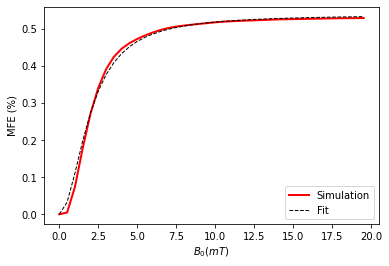

In [2]:
Bmax=20
dB=0.5
tmax=10e-6
dt=10e-9
flavin = rp.simulation.Molecule.fromdb("flavin_anion", ["H25"])  # , "H27", "H29"])
trp = rp.simulation.Molecule.fromdb("tryptophan_cation", ["H1"])  # , "Hbeta1"])
sim = rp.simulation.LiouvilleSimulation([flavin, trp])
time = np.arange(0, tmax, dt)
Bs = np.arange(0, Bmax, dB)
krec = 1.1e7
kesc = 7e6
kSTD = 1e8
kr = 7e7

results = mary(
    sim,
    init_state=State.TRIPLET,
    obs_state=State.TRIPLET,
    time=time,
    B=Bs,
    D=0,
    J=0,
    kinetics=[
        rp.kinetics.Haberkorn(krec, State.SINGLET),
        rp.kinetics.HaberkornFree(kesc),
    ],
    relaxations=[
        relaxation.SingletTripletDephasing(kSTD),
        relaxation.RandomFields(kr),
    ],
)
MARY = results["MARY"]
HFE = results["HFE"]
LFE = results["LFE"]

# np.save("./examples/data/fad_mary/results_5nuc_liouville_relaxation.npy", results)

Bhalf, fit_result, fit_error, R2 = rp.utils.Bhalf_fit(Bs, MARY)

plt.plot(Bs, MARY, color="red", linewidth=2)
plt.plot(Bs, fit_result, "k--", linewidth=1, label="Lorentzian fit")

plt.xlabel("$B_0 (mT)$")
plt.ylabel("MFE (%)")
plt.title("")
plt.legend([r"Simulation", r"Fit"])

print(f"HFE = {HFE: .2f} %")
print(f"LFE = {LFE: .2f} %")
print(f"B1/2 = {Bhalf: .2f} mT")
print(f"B1/2 fit error = {fit_error[1]: .2f} mT")
print(f"R^2 for B1/2 fit = {R2: .3f}")